## Random Forest Hyperparameter Tuning in Python - GeeksforGeeks 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

### Dataset Desciption:
Column desciption:-
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) - 1 represents Positive for diabetes



In [3]:
raw = pd.read_csv("Diabetes_dataset.csv", header=None)
col_names = ["pregnancy_count", "plasma_glucose","diastolic_bp","tricep_thk", "insulin", "bmi", "pedigree", "age","label"]
raw.columns = col_names
raw.head()

,pregnancy_count,plasma_glucose,diastolic_bp,tricep_thk,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print(raw.label.value_counts())

0    500
1    268
Name: label, dtype: int64

In [9]:
# train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(raw.drop(columns=['label']), raw.label, test_size=0.1, random_state=44)

In [10]:
print(y_train.value_counts())

0    458
1    233
Name: label, dtype: int64

In [11]:
# balancing train sample
from imblearn.over_sampling import SMOTE
oevrsample = SMOTE()
x_train, y_train = oevrsample.fit_resample(x_train, y_train)
print(y_train.value_counts())

0    458
1    458
Name: label, dtype: int64


In [12]:
#Base model for random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
print("Train Accuracy:: ", model.score(x_train,y_train))
print("Test Accuracy:: ",model.score(x_test,y_test))

Train Accuracy::  1.0
Test Accuracy::  0.8571428571428571


In [15]:
model.feature_importances_
feature_imp_df = pd.DataFrame({
    'features': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance')

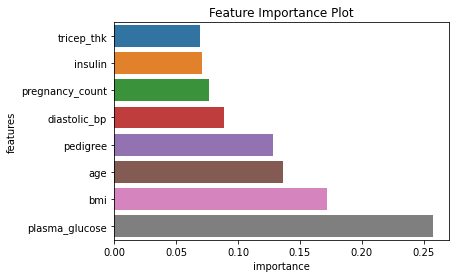

In [18]:
plt.title('Feature Importance Plot')
sns.barplot(data=feature_imp_df, x= 'importance', y='features');


plasma_glucose is the dominant feature in the dataset to predict the label.

In [53]:
from sklearn.metrics import f1_score

In [54]:
f1_score(model.predict(x_test), y_test)

0.8358208955223881

In [98]:
def parameter_performance(**hyp):
    model = RandomForestClassifier(n_jobs=-1, random_state=43, **hyp)
    model.fit(x_train, y_train)
    train_error = 1 - model.score(x_train, y_train)
    test_error = 1 - model.score(x_test, y_test) 
    for key, value in hyp.items():
        return {str(key): value, 'train_error': train_error, 'test_error': test_error}

In [99]:
# n_estimator
performance = pd.DataFrame([parameter_performance(n_estimators=i) for i in range(2,100,2)])

In [100]:
performance.head()

,n_estimators,train_error,test_error
0,2,0.094978,0.311688
1,4,0.044760,0.181818
2,6,0.025109,0.207792
3,8,0.009825,0.194805
4,10,0.008734,0.181818


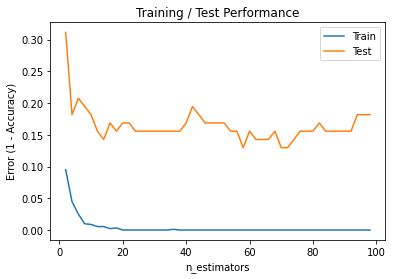

In [109]:
# Calling the helper function and supplying different n_estimator values 
performance = pd.DataFrame([parameter_performance(n_estimators=i) for i in range(2,100,2)])
# plotting the change in error for train and test data
plt.figure()
plt.plot(performance['n_estimators'], performance['train_error'])
plt.plot(performance['n_estimators'], performance['test_error'])
plt.title('Training / Test Performance')
# plt.xticks(range(0,21, 2))
plt.xlabel('n_estimators')
plt.ylabel('Error (1 - Accuracy)')
plt.legend(['Train', 'Test'])

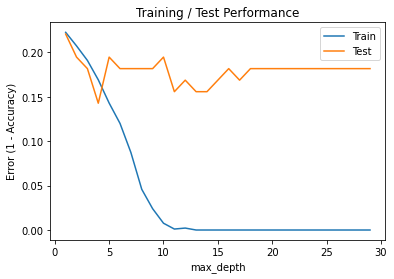

In [110]:
# max_depth
performance = pd.DataFrame([parameter_performance(max_depth=i) for i in range(1,30)])
plt.figure()
plt.plot(performance['max_depth'], performance['train_error'])
plt.plot(performance['max_depth'], performance['test_error'])
plt.title('Training / Test Performance')
# plt.xticks(range(0,21, 2))
plt.xlabel('max_depth')
plt.ylabel('Error (1 - Accuracy)')
plt.legend(['Train', 'Test'])

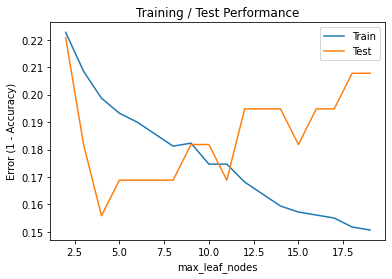

In [114]:
# max_leaf_nodes
performance = pd.DataFrame([parameter_performance(max_leaf_nodes=i) for i in range(2,20)])
plt.figure()
plt.plot(performance['max_leaf_nodes'], performance['train_error'])
plt.plot(performance['max_leaf_nodes'], performance['test_error'])
plt.title('Training / Test Performance')
# plt.xticks(range(0,21, 2))
plt.xlabel('max_leaf_nodes')
plt.ylabel('Error (1 - Accuracy)')
plt.legend(['Train', 'Test'])

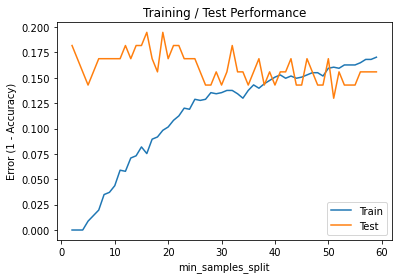

In [120]:
# min_sample_split
performance = pd.DataFrame([parameter_performance(min_samples_split =i) for i in range(2,60)])
plt.figure()
plt.plot(performance['min_samples_split'], performance['train_error'])
plt.plot(performance['min_samples_split'], performance['test_error'])
plt.title('Training / Test Performance')
# plt.xticks(range(0,21, 2))
plt.xlabel('min_samples_split')
plt.ylabel('Error (1 - Accuracy)')
plt.legend(['Train', 'Test'])

In [111]:
def manual_testing(**hyp):
    model = RandomForestClassifier(n_jobs=-1, random_state= 44, **hyp)
    model.fit(x_train, y_train)
    return model.score(x_train, y_train), model.score(x_test,y_test)

In [113]:
print("Train and Test score for min_impurity= 1e-2:: ",manual_testing(min_impurity_decrease=1e-2))
print("Train and Test score for min_impurity= 1e-3:: ",manual_testing(min_impurity_decrease=1e-3))
print("Train and Test score for min_impurity= 1e-4:: ",manual_testing(min_impurity_decrease=1e-4))
print("Train and Test score for min_impurity= 1e-5:: ",manual_testing(min_impurity_decrease=1e-5))
print("Train and Test score for min_impurity= 1e-6:: ",manual_testing(min_impurity_decrease=1e-6))

Train and Test score for min_impurity= 1e-2::  (0.7947598253275109, 0.8051948051948052)
Train and Test score for min_impurity= 1e-3::  (0.9683406113537117, 0.8051948051948052)
Train and Test score for min_impurity= 1e-4::  (0.9989082969432315, 0.8441558441558441)
Train and Test score for min_impurity= 1e-5::  (1.0, 0.8181818181818182)
Train and Test score for min_impurity= 1e-6::  (1.0, 0.8181818181818182)


## GridSearchCV

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
# intializing an estimator 
model = RandomForestClassifier(random_state=44, n_jobs= -1)

# creating a param_grid dictionary 
param_grid = {
    'n_estimators': [10,20,30,40,50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(2,7)],
    'min_samples_split': [10,20,30,40]
}

# carrying out a gridsearchCV
gridCV = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 5, 
    n_jobs = -1
)

#fitting the grid with training data
gridCV.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=44),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [10, 20, 30, 40],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [123]:
print("Best Score achieved:: ",gridCV.best_score_)
print("Best parameters:: ",gridCV.best_estimator_)

Best Score achieved::  0.8013007840342125
Best parameters::  RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=10,
                       n_estimators=40, n_jobs=-1, random_state=44)


In [124]:
new_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_split=10,
    n_estimators=40,
    n_jobs = -1,
    random_state=44
)

new_model.fit(x_train, y_train)
print("Train Score:: ",new_model.score(x_train,y_train))
print("Test Score:: ", new_model.score(x_test,y_test))

Train Score::  0.87117903930131
Test Score::  0.8181818181818182
